# Aero Sym HW 2

In [1]:
from Pyfiles import PyFiles
import math
import matplotlib.pyplot as plt

In [2]:
pyFi = PyFiles()

In [3]:
#p1
ss2 = 'math.sqrt(1 + (1/math.cos(x)**4))'
I2 = pyFi.guass_quad(ss2,0,2,2)
II2 = pyFi.guass_quad(ss2,0,2,3)
print I2, II2


23282.528780589008 17.552434926424443


In [4]:
#p2
ss = 'math.exp(-x**2)'
error = []
for a in [4,8,16,32,64,128]:
    I = pyFi.trapezoidal(ss,0,2,a)
    I = I*(2/math.sqrt(math.pi))
    error.append(math.log(abs(I - pyFi.erf2())))
    print "iteration: " + str(a) + "\t Integral: " + str(I)

iteration: 4	 Integral: 0.993671720902
iteration: 8	 Integral: 0.994896189688
iteration: 16	 Integral: 0.995214904823
iteration: 32	 Integral: 0.995295372402
iteration: 64	 Integral: 0.99531553858
iteration: 128	 Integral: 0.995320583204


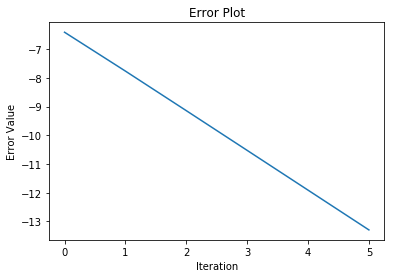

In [5]:
plt.plot(error)
plt.ylabel('Error Value')
plt.xlabel('Iteration')
plt.title('Error Plot')
plt.show()

This plot shows that the more iterations we do in an integral the less error there is between it and the actual answer. 

#p3
Logorithmic interpolations

#p4 The Mathematical definition of Curvature is any of a number of loosely related concepts in different areas of geometry. Intuitively, curvature is the amount by which a geometric object such as a surface deviates from being a flat plane, or a curve from being straight as in the case of a line, but this is defined in different ways depending on the context. 

In [6]:
#p5 - 8.15
x = [-2, -1, 0, 1, 2, 3, 4]
y = [-14, 0.5, 3.1, 0, -3, 0, 16]
xi = [i/100.0 for i in range(-200, 401, 1)]
cia = pyFi.lagrange_coef(x,y)
yia = pyFi.lagrange_eval(xi,x,cia)

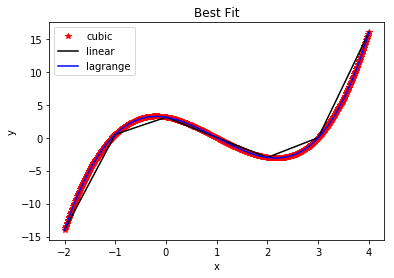

In [13]:
from scipy.interpolate import interp1d
myint =  interp1d(x, y,3)
ycubic = myint(xi)
myint =  interp1d(x, y)
ylinear = myint(xi)
plt.plot(xi,ycubic,'r*',xi,ylinear,'k',xi,yia,'b')
plt.ylabel('y')
plt.xlabel('x')
plt.title('Best Fit')
plt.legend(['cubic','linear','lagrange'])
plt.show()

301
301


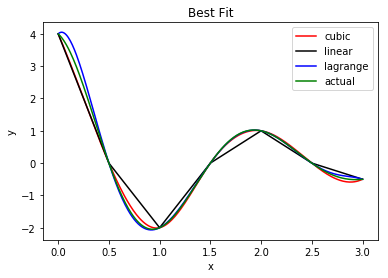

In [31]:
#p5 - 8.16
x = [0, 0.5, 1, 1.5, 2, 2.5, 3]
y = [4, 0.0, -2, 0.0, 1, 0.0, -0.5]
xi = [i/100.0 for i in range(0, 301, 1)]
yactual = [2**(2-a)*math.cos(math.pi*a) for a in xi]
print len(yactual)
print len(xi)
cia = pyFi.lagrange_coef(x,y)
yia = pyFi.lagrange_eval(xi,x,cia)
myint =  interp1d(x, y,3)
ycubic = myint(xi)
myint =  interp1d(x, y)
ylinear = myint(xi)
plt.plot(xi,ycubic,'r',xi,ylinear,'k',xi,yia,'b',xi,yactual,'g')
plt.ylabel('y')
plt.xlabel('x')
plt.title('Best Fit')
plt.legend(['cubic','linear','lagrange','actual'])
plt.show()

In [126]:
#p6 - 8.10
import numpy as np
from scipy.interpolate import interp2d

x = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
y = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
xi = np.arange(0,1.1,.1)
yi = np.arange(0,1.1,.1)
print xi
z = [0.0,    0.0,    0.0,    0.0,    0.0,    0.0,
     0.0, 0.0047, 0.0374, 0.1263, 0.2994, 0.5848,
     0.0, 0.0059, 0.0472, 0.1592, 0.3772, 0.7368,
     0.0, 0.0067, 0.0540, 0.1822, 0.4318, 0.8434,
     0.0, 0.0074, 0.0594, 0.2005, 0.4753, 0.9283,
     0.0, 0.0080, 0.0640, 0.2160, 0.5120, 1.0000]
ip = interp2d(x,y,z)
zi = ip(xi,yi)
print ip(xi,yi)
#print zip()
zactual = [(x**(1/3))*(y**3) for x,y in zip(xi,yi)] 

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[[0.       0.       0.       0.       0.       0.       0.       0.
  0.       0.       0.      ]
 [0.       0.001175 0.00235  0.00265  0.00295  0.00315  0.00335  0.003525
  0.0037   0.00385  0.004   ]
 [0.       0.00235  0.0047   0.0053   0.0059   0.0063   0.0067   0.00705
  0.0074   0.0077   0.008   ]
 [0.       0.010525 0.02105  0.0238   0.02655  0.02845  0.03035  0.031875
  0.0334   0.0347   0.036   ]
 [0.       0.0187   0.0374   0.0423   0.0472   0.0506   0.054    0.0567
  0.0594   0.0617   0.064   ]
 [0.       0.040925 0.08185  0.092525 0.1032   0.11065  0.1181   0.124025
  0.12995  0.134975 0.14    ]
 [0.       0.06315  0.1263   0.14275  0.1592   0.1707   0.1822   0.19135
  0.2005   0.20825  0.216   ]
 [0.       0.106425 0.21285  0.240525 0.2682   0.2876   0.307    0.32245
  0.3379   0.35095  0.364   ]
 [0.       0.1497   0.2994   0.3383   0.3772   0.4045   0.4318   0.45355
  0.4753   0.49365  0.512   ]
 [0.       0.22105  0.4421   0

[[0.       0.       0.       0.       0.       0.       0.       0.
  0.       0.       0.      ]
 [0.       0.001175 0.00235  0.00265  0.00295  0.00315  0.00335  0.003525
  0.0037   0.00385  0.004   ]
 [0.       0.00235  0.0047   0.0053   0.0059   0.0063   0.0067   0.00705
  0.0074   0.0077   0.008   ]
 [0.       0.010525 0.02105  0.0238   0.02655  0.02845  0.03035  0.031875
  0.0334   0.0347   0.036   ]
 [0.       0.0187   0.0374   0.0423   0.0472   0.0506   0.054    0.0567
  0.0594   0.0617   0.064   ]
 [0.       0.040925 0.08185  0.092525 0.1032   0.11065  0.1181   0.124025
  0.12995  0.134975 0.14    ]
 [0.       0.06315  0.1263   0.14275  0.1592   0.1707   0.1822   0.19135
  0.2005   0.20825  0.216   ]
 [0.       0.106425 0.21285  0.240525 0.2682   0.2876   0.307    0.32245
  0.3379   0.35095  0.364   ]
 [0.       0.1497   0.2994   0.3383   0.3772   0.4045   0.4318   0.45355
  0.4753   0.49365  0.512   ]
 [0.       0.22105  0.4421   0.49955  0.557    0.5973   0.6376   0.6697
  0.

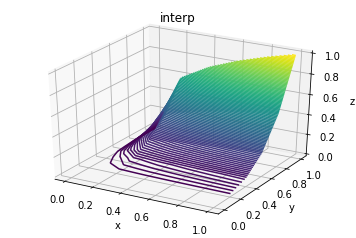

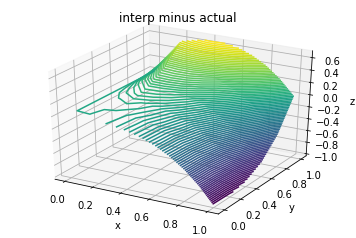

In [128]:
x = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
y = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
z = [0.0,    0.0,    0.0,    0.0,    0.0,    0.0,
     0.0, 0.0047, 0.0374, 0.1263, 0.2994, 0.5848,
     0.0, 0.0059, 0.0472, 0.1592, 0.3772, 0.7368,
     0.0, 0.0067, 0.0540, 0.1822, 0.4318, 0.8434,
     0.0, 0.0074, 0.0594, 0.2005, 0.4753, 0.9283,
     0.0, 0.0080, 0.0640, 0.2160, 0.5120, 1.0000]
zz = interp2d(x,y,z)
xx = np.linspace(0,1,11)
yy = xx
print zz(xx,yy)
from mpl_toolkits import mplot3d
figure = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(xi,yi,zz(xx,yy),101)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('interp')
ax.set_zlabel('z')
figure = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(xi,yi,zi - zactual,101)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('interp minus actual')
plt.show()